# Matrix Analysis 2022 - EE312
## Week 10 - Principal Component Analysis (PCA)
[LTS2](https://lts2.epfl.ch)

PCA is a classic technique for dimensionality reduction. As you will see in this notebook, this method uses  projections and eigenvalues.

## 1. Eigenvalues and PCA

Let us consider $N$ data points $\{x_k\}, k=1, ..., N$ in $\mathbb{R}^d$. During the rest of the exercise we will make the assumption that the mean value of these data points is 0, i.e. $\frac{1}{N}\sum_{k=1}^Nx_k=0$. We will denote by $X$ the $N\times d$ matrix s.t. :

$
X = \begin{pmatrix}
x_1^T\\
x_2^T\\ \vdots \\ x_N^T \end{pmatrix}$

**1.1**
Write the projection of the data points $x_k$ on a unit-norm vector $u\in\mathbb{R}^d$ using a matrix operation

**Answer** The projection of $x_k$ on $u$ can be written as $<x_k, u>u$ (since $||u||=1$). Therefore the result of $Xu$ is a column vector containing the value of the projection of each $x_k$ on $u$.

---

**1.2** Compute the variance of the projections of $x_k$ on $u$. **Reminder:** the variance of $\{b_k\}, k=1, ..., N$ is $\frac{1}{N}\sum_{k=1}^N||b_k - \bar{b}||^2$, where $\bar{b}$ is the mean value of the $b_k$.

**Answer**  Average of the projections is $\overline{<x_k,u>} = \frac{1}{N}\sum_{k=1}^N <x_k, u>=\frac{1}{N}\sum_{k=1}^N\sum_{p=1}^d x_{kp}u_p = \frac{1}{N}\sum_{p=1}^d u_p\sum_{k=1}^N x_{kp} = <\bar{x}, u>$.

Since the $x_k$ have a mean $\bar{x}$ of 0, the variance is $\frac{1}{N}\sum_{k=1}^N ||<x_k, u> - <\bar{x}, u>||^2 = \frac{1}{N}\sum_{k=1}^N <x_k,u>^2 = \frac{1}{N}(Xu)^TXu = \frac{1}{N}u^TX^TXu$

---

**1.3** Let us define the matrix $C = \frac{1}{N}X^TX$ (referred to as the **sample covariance matrix** in the litterature). What are the properties of this matrix ? What is the implication on its eigenvalues ?

**Answer** $C$ is symmetric positive semi-definite, so its eigenvalues are real and  $\geq 0$.

---

**1.4** PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. The following picture illustrate the principle for (blue) points in $\mathbb{R}^2$. Intuitively, the variance of the projected points (in red) will be maximized when the direction of projection matches the main direction of the point cloud in the picture.

![PCA](../exercises/images/pca.gif)

We will now try to find a vector $u$, $||u||=1$, s.t. the variance of the projection of the data on this vector is maximal. Let us order the eigenvalues of $C$ in a decreasing order, i.e. $\lambda_1\geq \lambda_2\geq...\geq \lambda_d$. Show that the eigenvector associated with the largest eigenvalue maximizes the variance of the projection of $x_k$. This will be the first vector used for the first principal component. (Hint: consider the orthonormal basis formed by the eigenvectors of $C$).

**Answer** From the previous question, we have $\text{Var}(\{x_k\}) = u^TCu$. Without loss of generality we can use the coordinate system formed by the eigenvectors of $C$. In this basis, 
$C = \begin{pmatrix}\lambda_1 & 0 & ... & 0\\ 0 & \lambda_2 & ... & 0 \\  &  & \ddots & \\ 0 & 0& ... & \lambda_d \end{pmatrix}$, therefore $\text{Var}(\{x_k\}) = \sum_{p=1}^d \lambda_pu_p^2\leq \lambda_1 \sum_{p=1}^du_p^2$. As we have $||u||=1$, this upper bound is achieved for $u = u_1 =\begin{pmatrix}1\\0\\0\\ \vdots \\ 0\end{pmatrix}$. Since we made the assumption of using the coordinate system defined by the eigenvectors of $C$, the vector $u$ that maximizes the variance of the projection is the eigenvector associated with the largest eigenvalue.

---

**1.5** What is the second vector that will maximize the variance of the $x_k$ minus their projection on the first principal component vector (i.e. eigenvector associated to $\lambda_1$) ?

**Answer** We can use a reasoning similar to the previous question, if we are in the basis formed by the eigenvectors of $C$, the coordinates of the residuals will have the component associated with $u_1$ equal to 0. The variance of the residual can be written as $\sum_{p=2}^d\lambda_pu_p^2\leq \lambda_2\sum_{p=2}^du_p^2$, and the upper bound is then reached at $u = u_2 =\begin{pmatrix}0\\1\\0\\ \vdots \\ 0\end{pmatrix}$

---

## 2. Applying PCA to data

After completing the previous part, you probably figured that PCA is achieved by iterating projections of residuals on eigenvectors of the covariance matrix. In this exercise, you will apply the PCA to a specific dataset.

### 2.1 Loading the dataset
The ["Olivetti faces dataset"](https://scikit-learn.org/stable/datasets/real_world.html?highlight=olivetti) is made of 400 64x64 images (represented as vectors containing 4096 elements). The dataset is made of pictures of 40 persons, with varying light conditions, facial expressions etc.

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
faces, labels = fetch_olivetti_faces(return_X_y=True, shuffle=True)

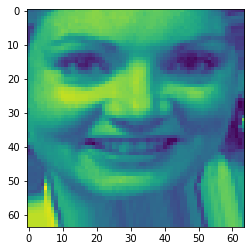

In [3]:
plt.imshow(np.reshape(faces[2,:], (64,64)))

The first step to perform the PCA is to remove the mean value from the input:

In [3]:
mean_face = np.mean(faces, axis=0)

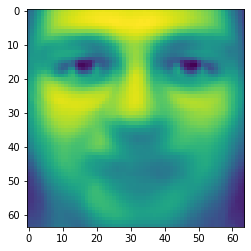

In [4]:
plt.imshow(np.reshape(mean_face, (64,64)))

In [5]:
faces_zero_centered = faces - mean_face

### 2.2 Covariance matrix
As seen in the theoretical part, you need compute the covariance matrix $C$ and compute its eigenvalues and eigenvectors (use the [numpy.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) function).

**Warning** Noto is _too slow_ to handle this. Use either a local installation or [google colab](https://colab.research.google.com/)

In [19]:
C = faces_zero_centered.T@faces_zero_centered/400

In [20]:
eig_vals, eig_vecs = np.linalg.eigh(C)

Using the [argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) function, sort the eigenvalues and eigenvectors appropriately (do not trust Numpy's `eigh` documentation !). Be careful, `argsort` sorts in ascending order only, do not forget to reverse the array !

In [28]:
sort_idx = np.argsort(eig_vals)[::-1]

In [29]:
sorted_eig_vals = eig_vals[sort_idx]

In [30]:
sorted_eig_vecs = eig_vecs[:, sort_idx]

Display the eigenvectors associated with the largest eigenvalues

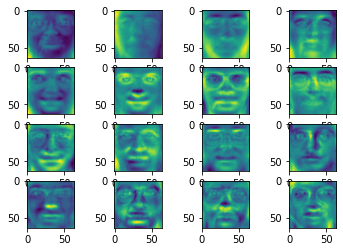

In [164]:
nrows = 4
ncols = 4
for k in range(nrows*ncols):
    plt.subplot(nrows, ncols, k+1)
    plt.imshow(np.reshape(sorted_eig_vecs[:, k], (64, 64)))

### 2.3 PCA 
We are finally ready to write a function that performs a PCA, i.e. given input data, returns its projection on the $n$ largest eigenvectors.

In [166]:
def pca(input_data, eig_vectors, n):
    W = eig_vectors[:, 0:n]
    return input_data@W

For a given input image, compute an approximation using $n$ principal components. How many components (approximately) do you need to have a result that is close to the original image ?

In [100]:
def pca_approx(pca_projection, eig_vectors, n):
    return eig_vectors[:, :n]@pca_projection

-2.6738164

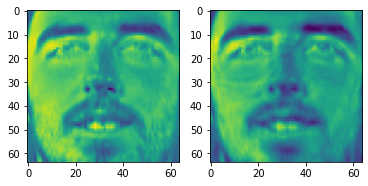

In [170]:
n = 150
img = faces_zero_centered[40, :]
cc = pca(img, sorted_eig_vecs, n)
approx = pca_approx(cc, sorted_eig_vecs, n)
plt.subplot(121)
plt.imshow(np.reshape(img, (64, 64)))
plt.subplot(122)
plt.imshow(np.reshape(approx, (64, 64)))
cc[0]

Depending on the image, 100 to 200 components yield a good approximation of the initial image.